### Objetivo: ¿Cuándo se prevén más lluvias?

Hacer un análisis y recomendación sobre las precipitaciones de la ciudad de Barcelona basados en sus datos históricos.

### Guión:

1. Obtener los datos necesarios y estructurarlos (https://opendata-ajuntament.barcelona.cat/data/ca/dataset/precipitacio-hist-bcn/resource/5da03f48-020e-4f46-9199-a919feac2034?inner_span=True) i https://www.meteo.cat/wpweb/climatologia/serveis-i-dades-climatiques/serie-climatica-historica-de-barcelona/.  


2. Guardar los datos de manera estructurada en formato SQL.  


3. Realizar un plan sobre (máximo una página) sobre el tipo de análisis a realizar y cómo se presentarán los resultados.  


4. Utilizar PANDAS, NUMPY, MATPLOTLIB (u otras librerías) junto a un cuaderno JUPYTER para la presentación del trabajo   realizado.  


5. Subir el resultado final a un repositorio privado de Github y compartirlo una vez finalizado con el tutor.  


Tiempo estimado: 2 días.  


### Debe teber:

- El plan sobre el análisis a realizar.


- Incluir un análisis supervisado y uno no supervisado.

### A considerar:

- Intentar no atascarse en ningún punto. Se evaluará el alcance del proyecto de manera global.


- No se busca la perfección en la ejecución del ejercicio, pero obtener información sobre las limitaciones y conocimientos de los candidatos para ofrecer feedback.

In [141]:
# Librerias básicas
import pandas as pd
import numpy as np
import re
from datetime import datetime
# Librerias visualización
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pandas_profiling import ProfileReport

#Otras
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings('ignore')

In [700]:
df = pd.read_csv('precipitacionsbarcelonadesde1786_format_long.csv')

In [701]:
df

,Any,Mes,Desc_Mes,Precipitacions
0,1786,1,Gener,32.8
1,1786,2,Febrer,28.4
2,1786,3,Març,84.4
3,1786,4,Abril,42.3
4,1786,5,Maig,8.5
...,...,...,...,...
2815,2020,8,Agost,12.4
2816,2020,9,Setembre,60.2
2817,2020,10,Octubre,23.1
2818,2020,11,Novembre,52.5


## 1. Introducción

Las precipitaciones varían de acuerdo a ciertos ciclos temporales determinados por los movimientos de rotación y traslación terrestres y por la localización astronómica o geográfica del lugar de que se trate. Esos ciclos pueden ser: diarios, mensuales o estacionales o en ciclos anuales, en efecto, siempre hay meses en que las precipitaciones son mayores que en otros. 

Para poder evaluar correctamente las características objetivas del clima, en el cual la precipitación, y en especial la lluvia, desempeña un papel muy importante, las precipitaciones mensuales deben haber sido observadas por un período de por lo menos 20 a 30 años, lo que se llama un período de observación largo.

La variación estacional de las precipitaciones, en especial de la lluvia, define el año hidrológico. Este da inicio en el mes siguiente al de menor precipitación media de largo período. 

    Fuentes: 1. https://es.wikipedia.org/wiki/Precipitaci%C3%B3n_(meteorolog%C3%ADa)#Origen_de_la_precipitaci%C3%B3n

### 1.1 Características del clima de Barcelona y sus precipicationes

La ciudad de Barcelona posee un clima mediterráneo con influencias marítimas. De acuerdo con los criterios de la clasificación de Köppen-Geiger la ciudad se encuentra próxima a una zona de transición del clima subtropical de veranos secos y calurosos Csa (clima mediterráneo) a un clima subtropical húmedo Cfa.

Una de las singularidades del clima mediterráneo asociadas al ciclo del agua es que la estación más húmeda es el otoño. Esto se debe a la inestabilidad generada por las diferencias de temperatura entre la superficie del mar Mediterráneo y la atmósfera. durante el otoño, las aguas del mar que se han calentado durante todo el verano, entran en contacto con el aire
frío. Esta diferencia térmica es la responsable de los chubascos intensos que en pocas horas dejan grandes cantidades de agua.

Los recurrentes episodios de sequía y de lluvias intensas son un hecho natural y típico de nuestra climatología mediterránea. En el futuro, según las proyecciones climáticas se prevé que el efecto que tendrá el cambio climático sobre el ciclo del agua en general, hará más acusada esta problemática de episodios extremos.

La precipitación media anual en Barcelona se sitúa en torno a los 600 mm, con un máximo de precipitaciones de fin de verano y principio de otoño (llegando a superar los 90 mm de media en octubre), que es originado a menudo por el fenómeno conocido como gota fría, que ha llegado a superar en numerosas ocasiones los 100 mm en un día.

La gota fría, DANA (depresión aislada en niveles altos) o baja segregada, es un fenómeno meteorológico anual que suele coincidir con el inicio del otoño y la primavera en el Mediterráneo occidental. Se experimenta particularmente en España y más concretamente a lo largo de la costa este y las islas Baleares, aunque sus efectos pueden sentirse en zonas interiores también. A grandes rasgos, la gota fría es el resultado de un frente de aire polar frío (corriente en chorro) que avanza lentamente sobre Europa occidental a gran altura (normalmente 5-9 km) y que, al chocar con el aire más cálido y húmedo del Mar Mediterráneo, genera fuertes y dañinas tormentas.

Por el contrario, el mínimo se produce al comienzo del verano, llegando a la media algo por encima de los 20 mm en julio. La humedad media anual es alta debido a las condiciones marítimas de la ciudad, situándose entre 69 y 70 % y variando poco a lo largo del año.


    Fuentes: 1. https://es.wikipedia.org/wiki/Barcelona#Clima
             2. https://www.barcelona.cat/barcelona-pel-clima/sites/default/files/documents/cap08_cicle_aigua-20180227.pdf
             3. https://es.wikipedia.org/wiki/Gota_fr%C3%ADa


### 1.2 Efectos del cambio climático   


El <b>Grupo Intergubernamental de Expertos sobre Cambio Climático</b> (más conocido por sus siglas en inglés, <b>IPCC</b>) es una entidad científica creada en 1988  por la Organización Meteorológica Mundial (OMM) y el Programa de las Naciones Unidas para el Medio Ambiente (PNUMA). El IPCC concluye que el calentamiento del sistema climático es inequívoco observado cambios en el sistema climático que no tienen precedente, tanto si se comparan con registros históricos observacionales, que datan de mediados del siglo XIX, como si se comparan con registros paleoclimáticos referidos a los últimos milenios. Las observaciones permiten afirmar que la atmósfera y los océanos se han calentado, que la cantidad y extensión de las masas de
hielo y nieve han disminuido, que el nivel del mar ha subido y que las concentraciones de gases de efecto invernadero han aumentafo (IPCC 2013).

La temperatura media global muestra un incremento de 0,85ºC (entre 0,65 y 1,06ºC) en el período 1880-2012. Cada una de las últimas tres décadas ha sido más calida que todas las anteriores desde 1850, siendo la primera década del siglo XXI la más cálida de todas. <b>Las tendencias en periodos cortos (entre 10 y 15 años) están muy afectadas por la variabilidad natural</b>, tal y como sucede, por ejemplo, en los últimos 15 años, en los que la tasa de calentamiento ha sido inferior a la media registrada desde 1951. 

La precipitación ha aumentado en las zonas terrestres de latitudes medias del hemisferio norte desde 1950. Se han observado cambios en los episodios extemos desde 1950. El número de días y noches frías ha disminuido y el número de días y noches cálidas ha aumentado a nivel global (IPCC 2013).

[...] Unas emisiones iguales a las tasas actuales o superiores inducirán <b> cambios en todos los componentes del sistema climático, algunos de ellos sin precedentes en cientos o miles de años. Los cambios tendrán lugar en todas las regiones del globo, incluyendo cambios en la tierra y en el océano, en el ciclo del agua</b>, en la criosfera, en el nivel del mar, en algunos episodios extremos y en la acidez de los océanos. Muchos de estos cambios persistirán durante muchos siglos. La limitación del cambio climático requerirá reducciones substanciales y sostenidas de las emisiones de CO2 (IPCC 2013).

[...] <b>En la región Mediterránea</b> tendrá lugar un incremento de temperatura superior a la media global, más pronunciado en los meses estivales que en los invernales. <b>Para el escenario RCP 8.5</b> y para finales del siglo XXI, la región Mediterránea experimentará incrementos medios de temperatura de 3,8ºC y de 6,0ºC en los meses invernales y estivales, respectivamente, y <b> reducciones medias de precipitación de 12% y 24% en los meses invernales y estivales </b>, respectivamente. Habrá un aumento de los extremos relacionados con las precipitaciones de origen tormentoso (IPCC 2013).

Los Escenarios RCP (del inglés, Representative Concentration Pathways) son cuatro escenarios de emisiones sobre la evolución estimada de la emisión y concentración de gases de efecto invernadero a la atmósfera durante el siglo XXI, establecidos por el IPCC para la elaboración de su quinto informe de evaluación. 

Los cuatro escenarios RCP son: RCP2.6, RCP4.5, RCP6.0 y RCP8.5, cuyo nombre se basa en el posible rango de valores de forzamiento radiativo alcanzado en 2100 (2,6; 4,5 ; 6,0 y 8,5 W / m2, respectivamente). El escenario RCP8.5 sigue el rango más alto de emisiones de gases de efecto invernadero, con concentraciones que crecen rápidamente

    Fuentes: 1. https://www.miteco.gob.es/es/cambio-climatico/temas/impactos-vulnerabilidad-y-adaptacion/cap2-tendenciasobservadasyproyeccionesdecambioclimaticosobreespana_tcm30-70204.pdf


### 1.3 Proyecciones de las precipitaciones en Barcelona   


El estudio realizado por el Servicio Meteorológico de Cataluña (SMC, 2015) sobre la generación de escenarios climáticos futuros regionalizados para el área metropolitana de Barcelona en una primera fase que incluye el periodo 1971-2050, concluye que para las próximas cuatro décadas, independientemente del escenario de emisiones, se proyecta por toda el área metropolitana <b> un aumento de temperatura </b> alrededor de 1ºC (horquilla de 0.8 a 1.1ºC) respecto al valor actual; <b> situándose 2050 entre 1 y 2ºC por encima de la media del periodo 1971-2000 </b>. este incremento afecta tanto a las temperaturas media como la máxima y la mínima, siendo sensiblemente mayor en los valores mínimos. Estacionalmente, el mayor incremento tendrá lugar en verano.

<b>Respecto a la precipitación, las simulaciones muestran un rango de variación más amplio, con una tendencia menos clara, sobre todo a escala estacional </b>. A grandes rasgos, se espera una ligera disminución que podría alcanzar los 55 mm, pero con una alta variabilidad interanual. Habrán pocos cambios o un aumento moderado en invierno y en verano, y una disminución marcada en primavera. Los extremos de precipitación aumentarán de manera apreciable, esperándose episodios de lluvias intensas.

    Fuentes: 1. https://www.amb.cat/es/web/ecologia/actualitat/publicacions/detall/-/publicacio/efectes-del-canvi-climatic-en-el-cicle-de-l-aigua-de-l-area-metropolitana/5773115/11818

### 1.4 Unidades de medida y historial de registros

La unidad de medida que usaremos para las precipitaciones acumuladas mensuales son los milímetros (mm). En el caso del agua, existe una correspondecia entre 1 mm y 1 l/m2, porque un litro en un cubo de un metro de ancho y un metro de largo ocupa en volumen exactamente un milímetro de altura. Un cubo de 1 metro cúbico (un metro de alto, uno de ancho y uno de alto) tiene una capacidad de 1000 litros. Si un metro de altura son 1000 milímetros (mm), entonces 1 mm corresponderá, por tanto, a un litro.

            1 mm = 1 l/m2
            
Las precipitaciones en forma de nieve también se expresan en cm (centímetros) en lugar de milímetros:

            1 cm nieve =  10 mm nieve
            
Se considera que, aproximadamente, el espesor de la nieve es 10 veces el del agua. Por tanto, 1 cm de nieve equivaldría aproximadamente a 1 mm de agua, aunque esto puede variar de 0,5 a 2 mm en función de la densidad de la nieve.

            1 cm nieve ≈ 1 mm lluvia

#### Historial de registros

Tenemos los datos de las precipitaciones acomuladas (mm) en la ciudad de Barcelona para cada mes desde enero de 1786 hasta diciembre de 2020.

In [18]:
df.isna().sum()

Date              0
Precipitacions    0
dtype: int64

### 1.5 Estructuración de los datos

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             2820 non-null   int64  
 1   Mes             2820 non-null   int64  
 2   Desc_Mes        2820 non-null   object 
 3   Precipitacions  2820 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 88.2+ KB


Añadimos la variable día con todos los valores en el día 1, para poder convertir las columnas de Año y Mes a formato 'datetime'. NO significa que los datos fueran recogidos al día uno de cada mes, es sólo para tener esta parte de la fecha. Pasamos las tres variables de fecha a string para juntarlas en una sola columna y a continuación pasarla a datetime. Así podremos trabajar con time series.

In [702]:
a = [1 for x in range(len(df))]

In [703]:
df['Dia'] = a

In [704]:
df['Dia'] = df['Dia'].astype(str)

In [705]:
df['Any'] = df.Any.apply(str)

In [706]:
df['Mes'] = df.Mes.apply(str)

In [707]:
df['Date'] = df['Any'] + '-' + df['Mes'] + '-' + df['Dia']

In [708]:
df['Date']

0        1786-1-1
1        1786-2-1
2        1786-3-1
3        1786-4-1
4        1786-5-1
          ...    
2815     2020-8-1
2816     2020-9-1
2817    2020-10-1
2818    2020-11-1
2819    2020-12-1
Name: Date, Length: 2820, dtype: object

In [709]:
pd.to_datetime(df['Date'])

0      1786-01-01
1      1786-02-01
2      1786-03-01
3      1786-04-01
4      1786-05-01
          ...    
2815   2020-08-01
2816   2020-09-01
2817   2020-10-01
2818   2020-11-01
2819   2020-12-01
Name: Date, Length: 2820, dtype: datetime64[ns]

In [710]:
df.drop(['Dia'], 1, inplace=True)

In [711]:
df = df[['Date', 'Any', 'Mes', 'Desc_Mes', 'Precipitacions']]

In [712]:
df.set_index('Date', inplace=True)

In [156]:
df.to_csv('data_precipitacions.csv')

## 2. Conexión a MySql

Pasamos los datos a MySql, creando la base de datos relacional y las tablas correspondientes, e inyectamos los datos directamente desde el Workbench. Nos conectamos a ella mediante python y accedemos a los datos.

In [21]:
import mysql.connector
from getpass import getpass
from mysql.connector import connect, Error

In [26]:
connection.close()

In [27]:
connection = connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database = 'precipitacions'
    )

Enter username: root
Enter password: ········


In [31]:
cursor = connection.cursor()

Comprobamos que funcionen la connexión y los datos cargados a MySQL. Los insertamos en un dataframe:

In [61]:
select_clients_query = "SELECT * FROM hist_bcn"

cursor.execute(select_clients_query)
result = cursor.fetchall()

In [62]:
result

[(1, '1786', '1', 'Gener', '32.8'),
 (2, '1786', '2', 'Febrer', '28.4'),
 (3, '1786', '3', 'MarÃ§', '84.4'),
 (4, '1786', '4', 'Abril', '42.3'),
 (5, '1786', '5', 'Maig', '8.5'),
 (6, '1786', '6', 'Juny', '38.0'),
 (7, '1786', '7', 'Juliol', '6.8'),
 (8, '1786', '8', 'Agost', '52.1'),
 (9, '1786', '9', 'Setembre', '62.0'),
 (10, '1786', '10', 'Octubre', '57.0'),
 (11, '1786', '11', 'Novembre', '195.8'),
 (12, '1786', '12', 'Desembre', '114.1'),
 (13, '1787', '1', 'Gener', '136.4'),
 (14, '1787', '2', 'Febrer', '27.4'),
 (15, '1787', '3', 'MarÃ§', '44.6'),
 (16, '1787', '4', 'Abril', '76.9'),
 (17, '1787', '5', 'Maig', '0.0'),
 (18, '1787', '6', 'Juny', '29.8'),
 (19, '1787', '7', 'Juliol', '34.7'),
 (20, '1787', '8', 'Agost', '14.9'),
 (21, '1787', '9', 'Setembre', '205.8'),
 (22, '1787', '10', 'Octubre', '12.4'),
 (23, '1787', '11', 'Novembre', '42.2'),
 (24, '1787', '12', 'Desembre', '0.0'),
 (25, '1788', '1', 'Gener', '9.9'),
 (26, '1788', '2', 'Febrer', '14.9'),
 (27, '1788', '3', 

In [63]:
columns = 'ind', 'Any', 'Mes', 'Mes_desc', 'Precipitacions'

In [64]:
sql_df = pd.DataFrame(result, columns=columns)

In [65]:
sql_df

,ind,Any,Mes,Mes_desc,Precipitacions
0,1,1786,1,Gener,32.8
1,2,1786,2,Febrer,28.4
2,3,1786,3,MarÃ§,84.4
3,4,1786,4,Abril,42.3
4,5,1786,5,Maig,8.5
...,...,...,...,...,...
2815,2816,2020,8,Agost,12.4
2816,2817,2020,9,Setembre,60.2
2817,2818,2020,10,Octubre,23.1
2818,2819,2020,11,Novembre,52.5


## 3. Exploración

In [66]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [67]:
profile

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1 Outliers

In [182]:
df.skew()

Any               0.000000
Mes               0.000000
Precipitacions    1.871138
dtype: float64

In [183]:
z = np.abs(stats.zscore(df))
print(z)

[[1.72469599 1.59325501 0.36676043]
 [1.72469599 1.30357228 0.46388918]
 [1.72469599 1.01388955 0.77229486]
 ...
 [1.72469599 1.01388955 0.58088516]
 [1.72469599 1.30357228 0.06811145]
 [1.72469599 1.59325501 0.17471041]]


In [184]:
outliers = np.where(z>3)

In [191]:
outliers

(array([  10,   20,   50,   57,   94,  296,  692,  704,  764,  808,  860,
         920,  969, 1041, 1076, 1340, 1344, 1391, 1461, 1545, 1593, 1630,
        1713, 1875, 1895, 1897, 1989, 2084, 2157, 2231, 2287, 2296, 2316,
        2325, 2374, 2421, 2492, 2504, 2710, 2793, 2794, 2811], dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int64))

In [189]:
outliers[0]

array([  10,   20,   50,   57,   94,  296,  692,  704,  764,  808,  860,
        920,  969, 1041, 1076, 1340, 1344, 1391, 1461, 1545, 1593, 1630,
       1713, 1875, 1895, 1897, 1989, 2084, 2157, 2231, 2287, 2296, 2316,
       2325, 2374, 2421, 2492, 2504, 2710, 2793, 2794, 2811], dtype=int64)

In [188]:
len(outliers[0])

42

De momento sólo los identificamos, aún no decidimos que hacer con ellos

### 3.2 Estudio de 1786 a 1990

In [744]:
mean_ppl = df['Precipitacions'].mean()

In [745]:
mean_ppl

49.41450354609924

In [714]:
df[:1990-1-1]['Precipitacions'].mean()

48.201710261569495

In [716]:
x = round(df.groupby(by='Mes')['Precipitacions'].mean().sum(),2)
print('La media histórica (1786-2020) anual de precipitaciones (mm) es igual a:', x)

La media histórica (1786-2020) anual de precipitaciones (mm) es igual a: 592.97


In [361]:
hist_prep = round(df[:'1990-1-1'].groupby(by='Mes')['Precipitacions'].mean().sort_values(ascending=False),2)
hist_prep

Mes
9     78.65
10    77.80
11    58.32
5     53.68
4     52.30
3     48.32
12    42.98
8     40.51
6     38.28
1     37.23
2     34.86
7     25.73
Name: Precipitacions, dtype: float64

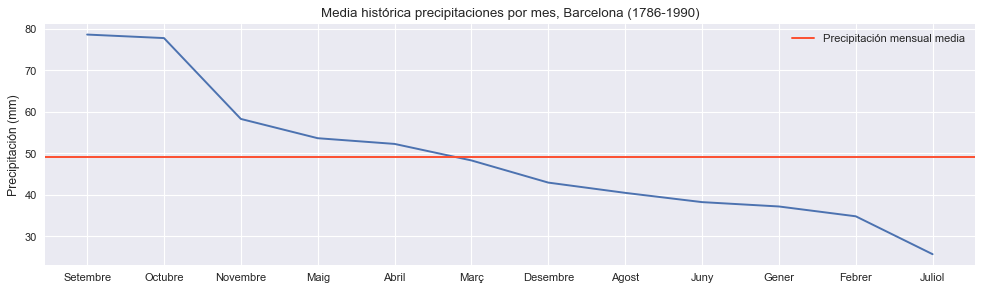

In [751]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df[:'1990-1-1'].groupby(by='Desc_Mes')['Precipitacions'].mean().sort_values(ascending=False))
plt.axhline(df[:'1990-1-1']['Precipitacions'].mean(), color ='#fc4f30', label='Precipitación mensual media')

plt.title('Media histórica precipitaciones por mes, Barcelona (1786-1990)')
# plt.xlabel('Mes (numérico)')
plt.ylabel('Precipitación (mm)')

plt.legend()

plt.show()

In [722]:
df['Any'] = df['Any'].astype(int)

In [723]:
df.describe()

,Any,Precipitacions
count,2820.000000,2820.000000
mean,1903.000000,49.414504
std,67.850074,45.308732
min,1786.000000,0.000000
25%,1844.000000,16.775000
50%,1903.000000,37.550000
75%,1962.000000,69.100000
max,2020.000000,365.800000


### 3.3 Estudio de 1990 a 2020

Creamos un df derivado del primero que incluya sólo los datos de los últimos 30 años (1990-2020) para comparar las medias hitóricas con las 'actuales'.

In [724]:
df30 = df[df['Any'] > 1989]

In [725]:
x = round(df30.groupby(by='Mes')['Precipitacions'].mean().sum(),2)
print('La media histórica (1990-2020) anual de precipitaciones (mm) es igual a:', x)

La media histórica (1990-2020) anual de precipitaciones (mm) es igual a: 620.6


In [726]:
prep90 = round(df30.groupby(by='Mes')['Precipitacions'].mean().sort_values(ascending=False),2)
prep90

Mes
10    88.25
9     81.40
4     63.87
11    58.65
5     56.34
3     53.05
12    45.94
1     44.63
2     34.68
6     32.05
8     31.51
7     30.23
Name: Precipitacions, dtype: float64

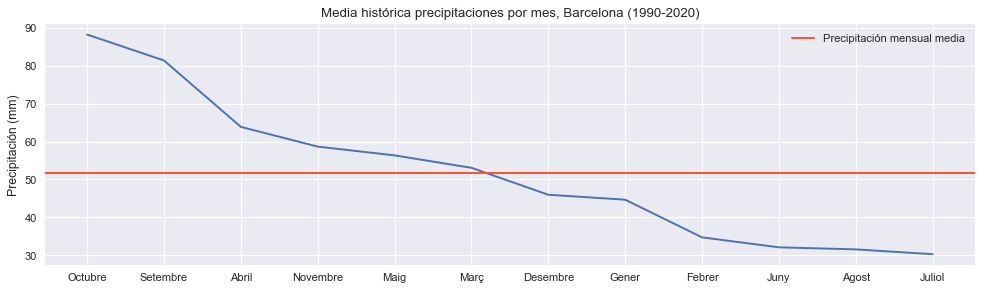

In [728]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df30.groupby(by='Desc_Mes')['Precipitacions'].mean().sort_values(ascending=False))

plt.title('Media histórica precipitaciones por mes, Barcelona (1990-2020)')

plt.axhline(df30['Precipitacions'].mean(), color ='#fc4f30', label='Precipitación mensual media')

plt.ylabel('Precipitación (mm)')

plt.legend()

plt.show()

Observamos que entre la media más alta de los últimos 30 años (octubre, 88.25mm) y la más baja (julio, 30.23mm) hay una diferencia de 58.02mm. En octubre hay tres veces las precipitaciones de julio, aproximadamente. Le siguen septiembre, con 81.40mm y abril, ya con cierta diferencia, 63.87mm.

A simple vista podemos dividir las temperaturas medias de los último treinta años en tres grupos:
                                            
                                                       1990-2020   1786-1990
    
    Grupo 1, máximas precipitaciones: 
    
                                        - Octubre:      88.25       77.80 (2)
                                        - Septiembre:   81.40       78.65 (1)         
        
    Grupo 2, precipitaciones medianas:
    
                                        - Abril:        63.87       52.30 (5)
                                        - Noviembre:    58.65       58.32 (3)
                                        - Mayo:         56.34       53.68 (4)
                                        - Marzo:        53.05       48.32 (6)
                                        - Diciembre:    45.94       42.98 (7)
                                        - Enero:        44.63       37.23 (10)
        
    Grupo 3, precipitacioines bajas: 
    
                                        - Febrero:      34.68       34.86 (11)
                                        - Junio:        32.05       38.28 (9)
                                        - Agosto:       31.51       40.51 (8)
                                        - Julio:        30.23       25.73 (12)
        


#### 3.3.1 Precipitaciones octubre 1990-2020

In [764]:
df30['Precipitacions'][df['Mes']=='10'].mean()

88.25161290322579

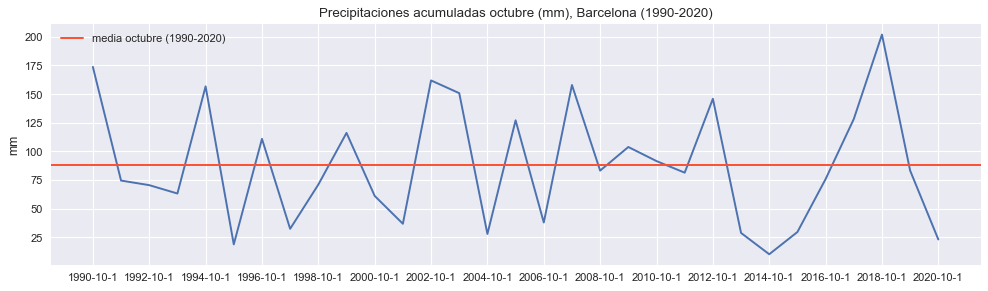

In [768]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df30['Precipitacions'][df['Mes']=='10'])
plt.axhline(df30['Precipitacions'][df['Mes']=='10'].mean(), color ='#fc4f30', label='media octubre (1990-2020)')

plt.title('Precipitaciones acumuladas octubre (mm), Barcelona (1990-2020)')
plt.ylabel('mm');

plt.legend()

plt.xticks(np.arange(0, 31, 2))

plt.show()

Con los datos de octubre, actualmente el mes con la media de precipitaciones más elevadas, podemos ver una gran variabilidad interanual, habiendo caído el año pasado (2020) tan solo 23.1 mm acumulados y el 2018, 201.9mm. 

A parte de su alta variabilidad, podemos apreciar cierto con un año de grandes lluvias y después uno o dos años con pocas precipitacions. No es exacto, pero si hay una especie de variabilidad interanual cíclia. Como veremos a continuación, este patrón aparece con mayor o menor variabilidad en el resto de meses lluviosos. Viendo las sumas anuales, el fenómeno es el mismo, por este motivo hablamos de años lluvios o de sequía.

#### 3.3.2 Precipitaciones septiembre 1990-2020

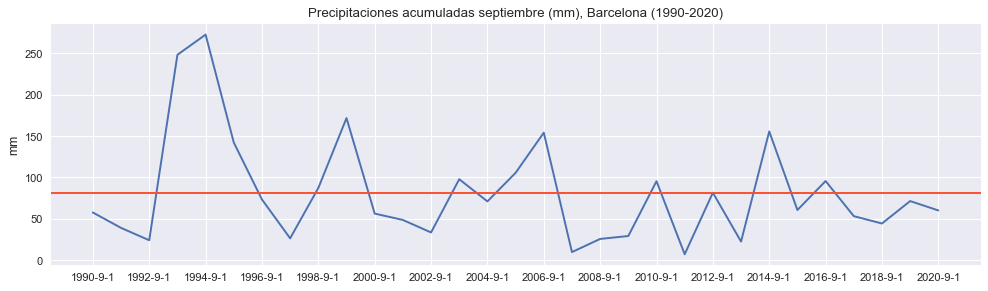

In [769]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df30['Precipitacions'][df['Mes']=='9'])
plt.axhline(df30['Precipitacions'][df['Mes']=='9'].mean(), color ='#fc4f30', label='media septiembre (1990-2020)')

plt.title('Precipitaciones acumuladas septiembre (mm), Barcelona (1990-2020)')
plt.ylabel('mm');

plt.xticks(np.arange(0, 31, 2))

plt.show()

#### 3.3.3 Precipitaciones abril 1990-2020

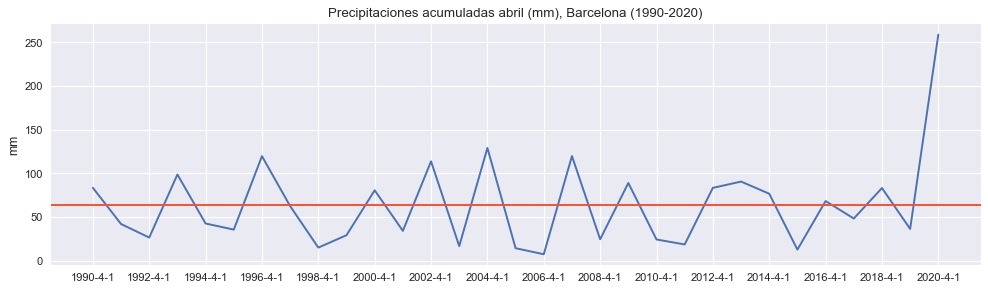

In [770]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df30['Precipitacions'][df['Mes']=='4'])
plt.axhline(df30['Precipitacions'][df['Mes']=='4'].mean(), color ='#fc4f30', label='media abril (1990-2020)')

plt.title('Precipitaciones acumuladas abril (mm), Barcelona (1990-2020)')
plt.ylabel('mm');

plt.xticks(np.arange(0, 31, 2))

plt.show()

#### 3.3.4 Precipitaciones noviembre 1990-2020

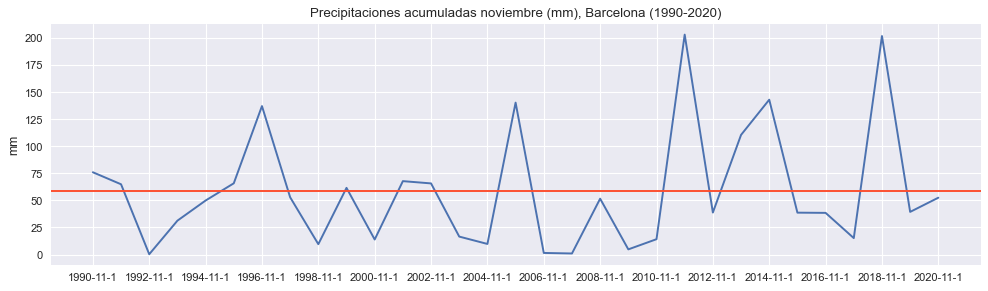

In [771]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df30['Precipitacions'][df['Mes']=='11'])
plt.axhline(df30['Precipitacions'][df['Mes']=='11'].mean(), color ='#fc4f30', label='media noviembre (1990-2020)')

plt.title('Precipitaciones acumuladas noviembre (mm), Barcelona (1990-2020)')
plt.ylabel('mm');

plt.xticks(np.arange(0, 31, 2))

plt.show()

#### 3.3.5 Variación interanual

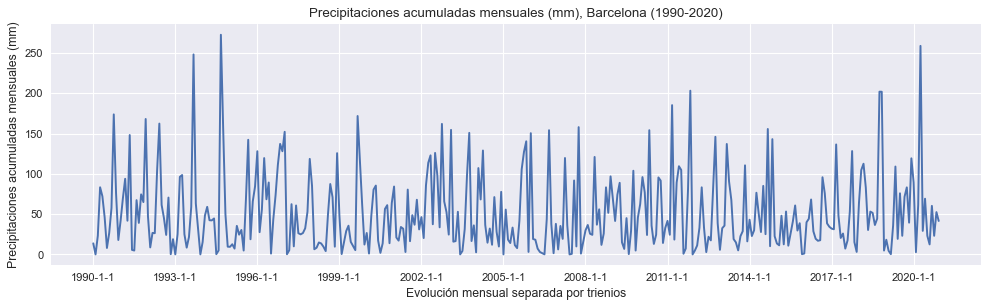

In [785]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df30.index, df30['Precipitacions'])

plt.title('Precipitaciones acumuladas mensuales (mm), Barcelona (1990-2020)')
plt.ylabel('Precipitaciones acumuladas mensuales (mm)');
plt.xlabel('Evolución mensual separada por trienios')

plt.xticks(np.arange(0, 396, 36))

plt.show()

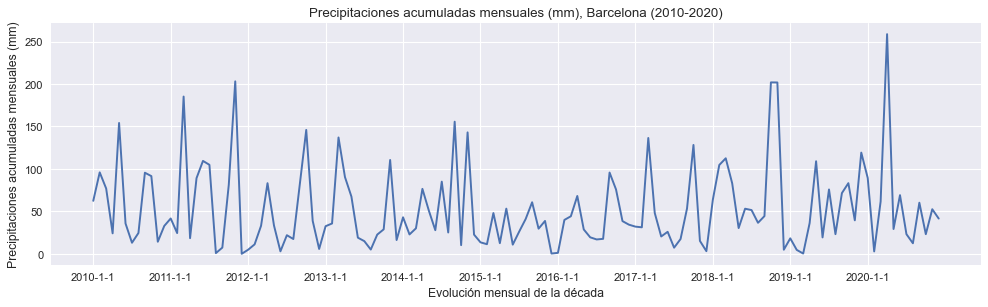

In [784]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df['2010-1-1':].index, df['2010-1-1':]['Precipitacions'])

plt.title('Precipitaciones acumuladas mensuales (mm), Barcelona (2010-2020)')
plt.ylabel('Precipitaciones acumuladas mensuales (mm)');
plt.xlabel('Evolución mensual de la década')

plt.xticks(np.arange(0, 132, 12))

plt.show()

## 4. Clusters No-Supervisados

In [181]:
#Librerias para clustering no-supervisado

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from kneed import DataGenerator, KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from scipy import stats
from scipy.stats import iqr
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [601]:
df = pd.read_csv('precipitacionsbarcelonadesde1786_format_long.csv')

In [602]:
a = [1 for x in range(len(df))]

df['Dia'] = a

df['Dia'] = df['Dia'].astype(str)

df['Any'] = df.Any.apply(str)

df['Mes'] = df.Mes.apply(str)

df['Date'] = df['Any'] + '-' + df['Mes'] + '-' + df['Dia']

df['Date']

pd.to_datetime(df['Date'])

df.drop(['Dia'], 1, inplace=True)

df = df[['Date', 'Any', 'Mes', 'Desc_Mes', 'Precipitacions']]

df.set_index('Date', inplace=True)

In [603]:
df['Mes'] = df['Mes'].astype(int)
df['Any'] = df['Any'].astype(int)

In [604]:
df.reset_index(inplace=True)

In [605]:
df.drop(['Desc_Mes', 'Date'], 1, inplace=True)

In [606]:
df

,Any,Mes,Precipitacions
0,1786,1,32.8
1,1786,2,28.4
2,1786,3,84.4
3,1786,4,42.3
4,1786,5,8.5
...,...,...,...
2815,2020,8,12.4
2816,2020,9,60.2
2817,2020,10,23.1
2818,2020,11,52.5


### 4.1 Hopkins Statistics

To understand if the dataset can be clustered, we will use the Hopkins statistic, which tests the spatial randomness of the data and indicates the cluster tendency or how well the data can be clustered. It calculates the probability that a given data is generated by a uniform distribution (Alboukadel Kassambara, n.d.). The inference is as follows for a data of dimensions ‘d’:

- If the value is around 0.5 or lesser, the data is uniformly distributed and hence it is unlikely to have statistically significant clusters.  

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster and therefore likely to have statistically significant clusters.

--------

In [607]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [608]:
round(hopkins(df), 5)

0.85122

El cálculo de Hopkins Statistics nos devuelve 0.85122, un valor entre 0.7 y 0.99, por lo cual en principio nuestros datos son clusterizables.


------

### 4.2 Elbow Method for K-Means

In [609]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

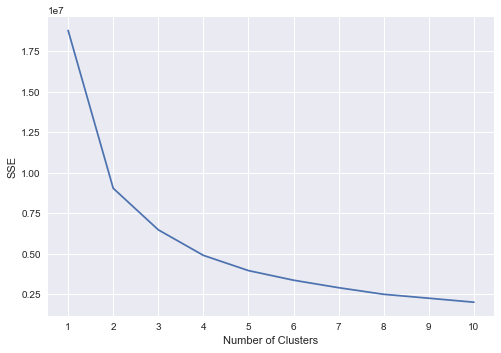

In [610]:
plt.style.use("seaborn")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [611]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

### 4.3 Silhouette coefficient en vez de SSE

In [612]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    score = metrics.silhouette_score(df, kmeans.labels_, sample_size = 1000)
    silhouette_coefficients.append(score)

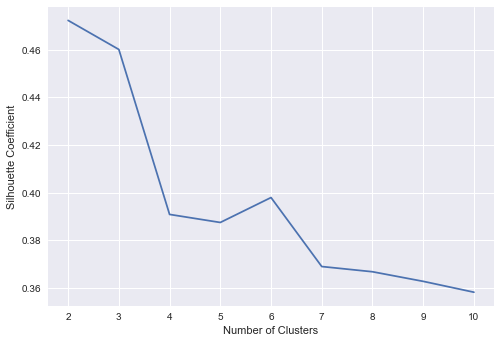

In [613]:
plt.style.use("seaborn")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### 4.4 Agrupación 

In [614]:
kmeans = KMeans(init="random",
       n_clusters=3,
       n_init=10,
     max_iter=300, 
    random_state= 0)

In [615]:
kmeans.fit(df)

KMeans(init='random', n_clusters=3, random_state=0)

In [616]:
# The lowest SSE value
kmeans.inertia_

6481130.369840046

In [617]:
# Locations of the centroid
kmeans.cluster_centers_

array([[1841.31965944,    6.40712074,   39.95162539],
       [1962.62340967,    6.35114504,   34.36064461],
       [1929.91977077,    7.34670487,  135.30143266]])

In [618]:
# The number of iterations required to converge
kmeans.n_iter_

14

In [619]:
labels = kmeans.labels_

In [620]:
labels

array([0, 0, 0, ..., 1, 1, 1])

Hacemos un scatter plot diferenciando por cluster de las precipitaciones por meses:

In [621]:
centroids = kmeans.cluster_centers_

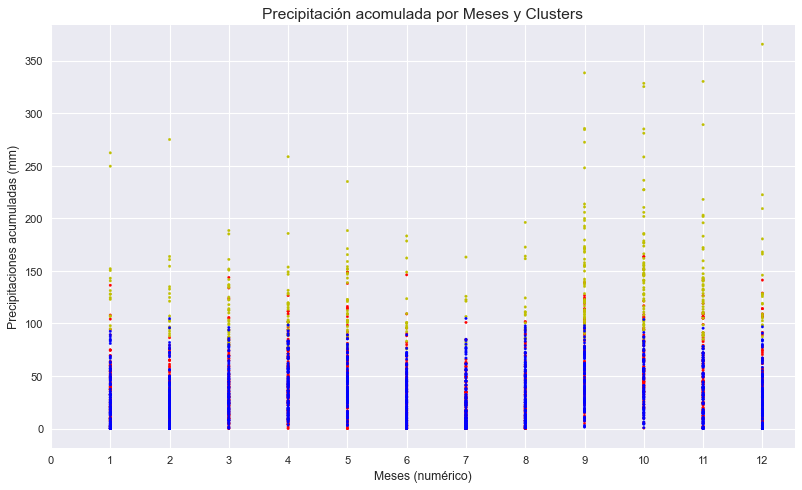

In [622]:
plt.style.use('seaborn')
figure(figsize=(12, 7), dpi=80)

colors = ['r','b','y','g','c','m'] 
plt.scatter(df['Mes'], df['Precipitacions'], color=[colors[l_] for l_ in labels], label=labels, s=5) 

plt.title('Precipitación acomulada por Meses y Clusters', size=14)

plt.xticks(np.arange(0, 13))
plt.xlabel('Meses (numérico)')
plt.ylabel('Precipitaciones acumuladas (mm)')
# plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.show()


Los puntos Rojos pertenecen al Cluster 0, los Azules al Cluster 1 y los Amarillos al Cluster 2. Viendo esta visualización podemos intuir que la cantidad de precipitaciones ha jugado un papel importante en la división de los clusters. Pero vamos a asegurarnos y ver como han quedado divididos los meses y años con el análisis estadístico de los clusters.

### 4.5 Estudio estadístico de los clusters

In [623]:
labels = pd.Series(labels)

In [624]:
df['Labels'] = labels

In [628]:
df['Labels'].value_counts(normalize=True)*100

0    45.815603
1    41.879433
2    12.304965
Name: Labels, dtype: float64

#### Número d'observacions assignades a cada cluster:

    Cluster 0:    1292    45.82%
    Cluster 1:    1181    42.88%
    Cluster 2:    347     12.30%

Agrupamos por clusters

In [304]:
label_grp = df.groupby(['Labels'])

#### 4.5.1 Precipitaciones

In [594]:
df['Precipitacions'].mean()

49.41450354609924

In [307]:
label_grp['Precipitacions'].describe()

,count,mean,std,min,25%,50%,75%,max
Labels,,,,,,,,
0,1292.0,39.951625,31.275677,0.0,14.8,35.0,58.35,163.6
1,1181.0,34.452667,24.648468,0.0,14.2,30.4,51.40,104.8
2,347.0,135.570029,49.610654,75.0,101.0,122.7,154.10,365.8


Podemos observar, a parte de la disparidad de registros en cada cluster, una desigualdad en las medias de precipitaciones.
El primer (0) y el segundo (1) cluster tienen unas medias parecidas (39,95 y 34,45mm respectivamente), aunque inferiores a la media de la población (49,41). El tercer cluster (2) se desmarca, con una media de 135,57mm y una desviación estandar de 49,61.

Es significativo observar que mientras el mínimo de los dos primeros clusters es 0, el del tercero es 75. Los máximos siguen un patron parecido: (1) 163,6  (2) 104,8  (3) 365,8. 

Vamos a investigar como han quedado repartidos los meses y años para cada uno.

#### 4.5.2 Meses

En el df original los valores de los meses son proporcionalmente iguales (=0,83333). A continuación podemos ver como han quedado repoartidos por Clusters:

In [546]:
round(label_grp['Mes'].value_counts(normalize=True)*100,2)

Labels  Mes
0       12      8.82
        1       8.75
        7       8.75
        2       8.67
        5       8.67
        8       8.59
        6       8.51
        4       8.44
        3       8.36
        11      7.97
        10      7.59
        9       6.89
1       7       9.74
        6       9.31
        8       9.14
        1       9.06
        2       8.98
        12      8.55
        4       8.30
        3       7.96
        5       7.71
        11      7.62
        9       7.28
        10      6.35
2       10     17.87
        9      17.29
        11     12.10
        3       9.51
        5       9.22
        4       8.07
        12      5.76
        2       4.90
        8       4.61
        1       4.32
        6       4.32
        7       2.02
Name: Mes, dtype: float64

Conociendo como se reparten las cantidades de precipitaciones anuales por meses podemos inferir qué lógica ha seguido el proceso de clustering no-supervisado. 

Viendo la repartición proporcional de meses por cluster sabemos que si la aparición de ese mes en el cluster es superior a 8,33%, estará por encima de la media de la población, mientras que si es inferior estará por debajo.

En el <b>primer cluster(0)</b> los valores estan repartidos casi equitativamente, destacan por debajo de la media:

    Septiembre: 6,88%
    Octubre:    7,58%
    Noviembre:  7,97%
    
Y por encima, ningún mes aparece más de un 0.5% que la media de la población (estan por debajo de 8,83%). Los mas presentes son:
    
    Diciembre:  8,82%
    Enero:      8,75%
    Julio:      8,75%
    
Conc. Vemos como los meses con menos presencia coinciden con los meses históricos de más precipitaciones.

En el <b>segundo cluster(1)</b> hay una mayor variabilidad en la presencia proporcional de cada mes, tanto por encima como por debajo de la media. Destacan por debajo:  
             
    Octubre:    6,35%
    Septiembre: 7,28%
    Noviembre:  7,62%
    
Y por encima de la media:
    
    Julio:      9.74%
    Junio:      9.31%
    Agosto:     9.14%
    
    
Conc. En el caso del segundo cluster vemos que la distribución de los meses es parecida a la del primero, pero acentuando su caso. Los meses que menos aparecen corresponden también a los más lluviosos históricamente y los que más aparecen, a los menos lluviosos.

En el <b>tercer cluster(2)</b> las distribuciones son totalmente dispares, teniendo meses que aparecen hasta ocho veces más que otros (Octubre/Julio). Tenemos a octubre (17.87%) y septiembre (17.29%), que doblan la media, y noviembre significativament por encima (12.10%).

El menos representado es julio (2.02%), seguido por junio, enero, agosto y febrero (todos alrededor del 4%).

Conc. En el tercer cluster se observa una tendencia clara a reunir aquellos registros de los meses que están asociados históricamente con la mayor cantidad de precipitaciones.
    
 
    

#### 4.5.1 Años

In [548]:
len(df['Any'].unique())

235

La media de la población en este caso es igual a 1/número de años distintos = 1/235 = 0,00425 = 0,42%

In [312]:
label_grp['Any'].describe()

,count,mean,std,min,25%,50%,75%,max
Labels,,,,,,,,
0,1292.0,1841.319659,32.945499,1786.0,1813.0,1840.0,1869.0,1902.0
1,1181.0,1962.616427,34.023512,1901.0,1934.0,1963.0,1992.0,2020.0
2,347.0,1929.755043,49.542362,1786.0,1897.0,1926.0,1969.0,2020.0


In [568]:
round(label_grp['Any'].value_counts(normalize=True)*100,2)[2].unique()

array([1.44, 1.15, 0.86, 0.58, 0.29])

In [570]:
round(label_grp['Any'].value_counts(normalize=True)*100,2)[2].value_counts()

0.29    56
0.58    52
0.86    33
1.15    12
1.44     8
Name: Any, dtype: int64

In [585]:
grp_144 = [1901, 1906, 1907, 1921, 1923, 1943, 1971, 1996]

In [593]:
df[df['Any'] == 1901].describe()

,Any,Mes,Precipitacions
count,12.0,12.000000,12.000000
mean,1901.0,6.500000,85.883333
std,0.0,3.605551,69.310642
min,1901.0,1.000000,9.200000
25%,1901.0,3.750000,31.000000
50%,1901.0,6.500000,65.850000
75%,1901.0,9.250000,130.725000
max,1901.0,12.000000,209.300000


In [592]:
df.isin({'Any': [grp_144]}).value_counts()

Any    Mes    Precipitacions
False  False  False             2820
dtype: int64

In [572]:
round(label_grp['Any'].value_counts(normalize=True)*100,2)[2]

Any
1901    1.44
1906    1.44
1907    1.44
1921    1.44
1923    1.44
1943    1.44
1971    1.44
1996    1.44
1884    1.15
1899    1.15
1900    1.15
1918    1.15
1922    1.15
1926    1.15
1933    1.15
1951    1.15
1959    1.15
1969    1.15
1987    1.15
2002    1.15
1853    0.86
1856    0.86
1872    0.86
1875    0.86
1876    0.86
1879    0.86
1881    0.86
1888    0.86
1894    0.86
1896    0.86
1897    0.86
1898    0.86
1908    0.86
1910    0.86
1911    0.86
1913    0.86
1914    0.86
1915    0.86
1916    0.86
1917    0.86
1925    0.86
1927    0.86
1928    0.86
1931    0.86
1935    0.86
1936    0.86
1946    0.86
1953    0.86
1962    0.86
1982    0.86
2005    0.86
2011    0.86
2018    0.86
1790    0.58
1844    0.58
1857    0.58
1866    0.58
1871    0.58
1873    0.58
1874    0.58
1882    0.58
1885    0.58
1890    0.58
1891    0.58
1893    0.58
1895    0.58
1902    0.58
1903    0.58
1905    0.58
1909    0.58
1920    0.58
1932    0.58
1934    0.58
1937    0.58
1938    0.58
1939    0.58
1941    

In [565]:
round(label_grp['Any'].value_counts(normalize=True)*100,2)[2].keys().sort_values()

Int64Index([1786, 1787, 1790, 1793, 1810, 1811, 1820, 1840, 1843, 1844,
            ...
            2008, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020], dtype='int64', name='Any', length=161)

In [558]:
len((label_grp['Any'].value_counts(normalize=True)*100)[0].keys())

117

In [559]:
len((label_grp['Any'].value_counts(normalize=True)*100)[1].keys())

120

In [560]:
len((label_grp['Any'].value_counts(normalize=True)*100)[2].keys())

161

Esta variable es más dificil de describir porqué tiene 235 valores distintos. Del mismo modo que antes, compararemos su proporción en cada cluster con la media de la población. Podemos ver que en los 3 casos ocurre un fenomeno similar. La mayoría de los años aparecidos en cada cluster tiene una proporción superior o muy superior a la de la media. Este hecho nos indica que es muy probable que no aparezcan registros de todos los años en cada cluster es decir, que los años han quedado repartidos por clusters.

Años distintos por cluster (sobre 235):

    Cluster 0:    117
    Cluster 1:    120
    Cluster 2:    161

Ordenando por fecha ascendiente vemos en qué rango estñan los años de cada cluster:

    Cluster 0:    1786 - 1902
    Cluster 1:    1901 - 2020
    Cluster 2:    1786 - 2020

El tercer cluster incluye todos los años pero tiene una distribución particular de estos. Los años quedan agrupados en 5 tipos de distribuciones: 1.44, 1.15, 0.86, 0.58, 0.29. Recordamos que la media era 0,42%. Tenemos cuatro grupos que aparecen por encima la media, destacando por encima el de 1.44. Hay un grupo por debajo la media, 0.29.
    
    Tipo    años distintos
    
    0.29    56
    0.58    52
    0.86    33
    1.15    12
    1.44     8

### 4.6 Conclusiones estudio de clusters

Después de analizar los valores de cada una de las variables en cada cluster podemos inferir que el algoritmo no-supervisado ha dividio:

    1. Por año: en el caso del primer cluster(0) y segundo cluster(1) hay una clara división en los datos incluidos en cada        uno según un rango temporal. Siendo el del primero de 1786 a 1902 y el del segundo de 1901 a 2020. Esta división no        se ha aplicado al tercer cluster, que incluía valores de todos los años. Ahora bien,
    
    2. en el caso del tercer cluster, teniendo en cuenta la variable 'Año', hemos encontrado otro patrón. Aún conteniendo          registros de todos los años, sus distribuciones estaban repartidas en 5 tipos. Podríamos decir que hemos encontrado        clusters dentro de un cluster. Vemos una tendencia, hay más años con menos presencia (56 con 0.29, pode debajo la          media) y viceversa (8 con 1.44).
    
    3. Por meses: mientras el primer y segundo cluster han mantenido una proporción de meses similar a la media de la              población, el tercer cluster se ha desmarcado. Teniendo mayoritáriamente meses asociados a la mayor cantidad de            precipitación.
    
    4. Por precipitación: siguiendo la misma lógica, el primer y segundo cluster han tenido una media de                          precipitación parecida, aunque inferior a la media de la población. Mientras que el tercer cluster, su valor mínimo        ya era significativamente superior a la media poblacional. 
    
    5. Por último, el número de registros: los dos primeros clusters han reunido el 88.7% de los registros y el tercero el        12.3%.  
    
-----
 
<b>Cluster 0</b>: cluster con 1292 (45.82%) registros, con datos del 1786 al 1902 y una distribución similar de los meses. Media de precipitaciones 39.95mm con desviación típica de	31.28.
    
<b>Cluster 1</b>: cluster con 1181 (42.88%) registros, datos del 1901 al 2020 y una distribución de los meses mñas acentuada hacía aquellos asociados a menos precipitaciones. Media de precipitaciones 34.45mm y una desviación típica de 24.65.
    
<b>Cluster 2</b>: cluster con 347 (12.30%) registros, datos del 1786 al 2020, con una distribución de meses totalmente inclinada hacía los meses asociados con más precipitaciones.
 

## 5. Cuándo se prevén más precipitaciones

In [524]:
# Librerias regresión lineal
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

import statsmodels.api as sm
import math, datetime
import random

### 5.1 Modelo elegido y justificación

El modelo supervisado que se ajusta más al problema en cuestión (determinar la cantidad de precipitaciones acumuladas en cada mes en mm) es el de regresión lineal ya que nos permite trabajar con datos numéricos continuos.

In [472]:
df = pd.read_csv('precipitacionsbarcelonadesde1786_format_long.csv')

In [464]:
columns= ['Year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [466]:
temp_max = pd.read_csv('temp_max_anual.txt', delimiter = '\t', names=columns)

In [468]:
temp_min = pd.read_csv('temp_min_anual.txt', delimiter = '\t', names=columns)

In [469]:
temp_min

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,5.4,6.5,7.8,7.6,12.9,17.9,21.4,19.1,17.1,14.2,10.1,3.0
1,1951,5.2,4.7,6.2,8.2,10.6,15.8,18.5,17.6,17.1,11.8,9.2,6.9
2,1952,2.7,3.8,9.2,10.2,13.5,18.0,20.1,19.2,15.4,13.4,8.0,5.4
3,1953,3.6,3.7,6.6,9.3,14.3,14.4,18.0,19.2,16.8,13.3,10.6,9.0
4,1954,2.8,3.2,7.4,7.9,11.0,15.7,16.7,17.1,16.6,14.2,10.5,7.1
5,1955,8.0,5.2,6.5,10.0,12.7,15.4,19.2,18.9,16.4,12.3,8.7,7.6
6,1956,6.1,-1.8,7.0,7.8,13.0,13.7,18.2,18.2,17.3,11.8,6.3,5.2
7,1957,4.0,7.5,8.8,8.4,10.8,14.8,17.8,18.3,16.9,12.3,8.5,5.3
8,1958,4.4,6.4,6.3,7.0,13.2,15.3,17.8,19.0,18.7,12.7,9.1,7.0
9,1959,5.2,6.6,8.3,9.3,12.0,15.8,19.9,18.8,16.3,12.2,8.0,5.7


In [467]:
temp_max

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,10.9,13.3,14.8,15.4,20.0,26.4,29.9,27.0,24.5,20.4,16.4,8.5
1,1951,10.6,11.3,13.4,14.9,17.6,24.2,26.7,25.8,23.5,17.5,14.3,11.8
2,1952,8.2,10.9,15.2,16.9,22.0,26.7,28.6,28.2,22.6,20.3,14.1,11.0
3,1953,9.5,10.0,13.2,17.4,22.9,22.4,25.8,27.2,25.1,19.5,15.3,13.1
4,1954,9.0,10.0,13.6,15.1,18.8,23.3,24.5,26.2,24.4,21.2,16.4,12.8
5,1955,12.9,11.6,12.7,17.7,20.6,23.5,27.7,27.0,23.7,18.7,14.1,13.4
6,1956,11.3,6.3,13.5,14.8,20.7,21.5,26.5,26.2,25.1,18.7,12.1,10.8
7,1957,10.2,14.1,15.3,16.5,17.3,22.1,26.2,25.7,24.0,18.4,13.3,10.1
8,1958,9.8,14.0,14.0,15.3,21.2,23.4,26.3,26.9,25.3,19.7,14.4,12.1
9,1959,10.9,11.8,14.2,17.6,19.6,23.6,28.2,26.4,22.8,18.2,13.2,11.8


In [473]:
a = [1 for x in range(len(df))]

df['Dia'] = a

df['Dia'] = df['Dia'].astype(str)

df['Any'] = df.Any.apply(str)

df['Mes'] = df.Mes.apply(str)

df['Date'] = df['Any'] + '-' + df['Mes'] + '-' + df['Dia']

df['Date']

pd.to_datetime(df['Date'])

df.drop(['Dia'], 1, inplace=True)

df = df[['Date', 'Any', 'Mes', 'Desc_Mes', 'Precipitacions']]

df.set_index('Date', inplace=True)

In [474]:
df

,Any,Mes,Desc_Mes,Precipitacions
Date,,,,
1786-1-1,1786,1,Gener,32.8
1786-2-1,1786,2,Febrer,28.4
1786-3-1,1786,3,Març,84.4
1786-4-1,1786,4,Abril,42.3
1786-5-1,1786,5,Maig,8.5
...,...,...,...,...
2020-8-1,2020,8,Agost,12.4
2020-9-1,2020,9,Setembre,60.2
2020-10-1,2020,10,Octubre,23.1


### 5.2 Regresión últimos 3 años

In [646]:
len(df30)

372

In [631]:
df30.drop(['Desc_Mes'], 1, inplace=True)

In [632]:
df30['Mes'] = df30['Mes'].astype(int)
df30['Any'] = df30['Any'].astype(int)

In [636]:
df30

,Any,Mes,Precipitacions
Date,,,
1990-1-1,1990,1,13.7
1990-2-1,1990,2,0.0
1990-3-1,1990,3,23.1
1990-4-1,1990,4,83.3
1990-5-1,1990,5,72.2
1990-6-1,1990,6,45.9
1990-7-1,1990,7,8.0
1990-8-1,1990,8,26.6
1990-9-1,1990,9,57.7


In [633]:
corr = df30.corr()

In [634]:
corr.round(4)

,Any,Mes,Precipitacions
Any,1.0000,0.0000,-0.0184
Mes,0.0000,1.0000,0.1219
Precipitacions,-0.0184,0.1219,1.0000


In [635]:
forecast_col ='Precipitacions'

In [647]:
X = df30.drop([forecast_col],1)
y = df30[forecast_col]

In [648]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [649]:
steps = [('scaler', StandardScaler()), ('rf', LinearRegression())]
pipeline = Pipeline(steps)

In [650]:
#parameters = {'rf__n_estimators':[100, 500, 700], 'rf__max_features':['auto', 
#sqrt', 'log2'], 'rf__class_weight':['balanced',None]}

In [651]:
parameters = {}

In [652]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [653]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = -0.02
{}


In [654]:
lr_pred = grid.predict(X_test)

In [655]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred})
df_lr

,Actual,Predicted
Date,,
2000-6-1,17.2,52.596000
2016-6-1,19.4,50.972996
1992-3-1,26.7,47.894882
2017-12-1,3.1,61.896797
2011-6-1,109.4,51.480184
2002-12-1,52.5,63.418364
2009-7-1,45.0,53.520600
2005-4-1,14.1,48.413731
2002-4-1,113.6,48.718044


### 5.3 Regresión todos los datos hitóricos

In [656]:
df

,Any,Mes,Precipitacions,Labels
0,1786,1,32.8,0
1,1786,2,28.4,0
2,1786,3,84.4,0
3,1786,4,42.3,0
4,1786,5,8.5,0
...,...,...,...,...
2815,2020,8,12.4,1
2816,2020,9,60.2,1
2817,2020,10,23.1,1
2818,2020,11,52.5,1


In [475]:
df.drop(['Desc_Mes'], 1, inplace=True)

In [657]:
df['Mes'] = df['Mes'].astype(int)
df['Any'] = df['Any'].astype(int)

In [658]:
corr = df.corr()

In [659]:
corr.round(4)

,Any,Mes,Precipitacions,Labels
Any,1.0000,-0.0000,0.0555,0.6792
Mes,-0.0000,1.0000,0.1465,0.0620
Precipitacions,0.0555,0.1465,1.0000,0.4815
Labels,0.6792,0.0620,0.4815,1.0000


In [660]:
forecast_col ='Precipitacions'

In [661]:
X = df.drop([forecast_col],1)
y = df[forecast_col]

In [677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [678]:
steps = [('scaler', StandardScaler()), ('rf', RandomForestRegressor())]
pipeline = Pipeline(steps)

In [683]:
parameters = {'rf__n_estimators':[100, 500, 700], 'rf__max_features':['auto', 
'sqrt', 'log2']}

In [684]:
# parameters = {}

In [685]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [686]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = 0.41
{'rf__max_features': 'auto', 'rf__n_estimators': 500}


In [687]:
lr_pred = grid.predict(X_test)

In [688]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred})
df_lr

,Actual,Predicted
337,2.5,3.1792
1559,50.1,32.3078
1402,28.0,10.5796
1602,1.5,48.8724
1281,66.9,55.6314
...,...,...
2323,20.3,55.7406
2628,0.0,28.4424
2012,135.3,177.9930
852,36.5,54.2442


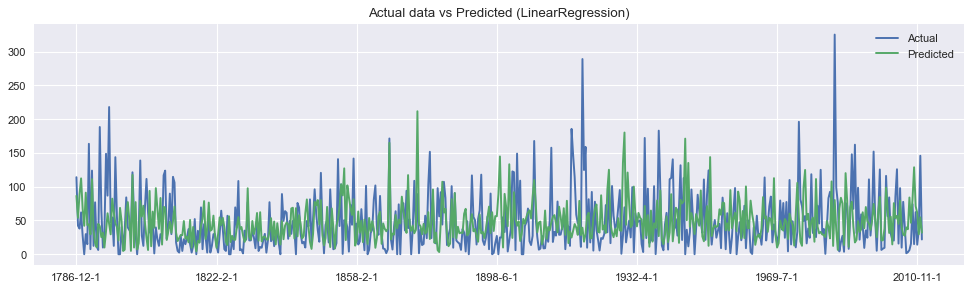

In [689]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(df_rf.index.sort_values()[:-20], df_rf.Actual[df_rf.index.sort_values()][:-20], label='Actual')
plt.plot(df_rf.index.sort_values()[:-20], df_rf.Predicted[df_rf.index.sort_values()][:-20],label='Predicted')

plt.xticks(np.arange(0, 564, 90))

plt.title('Actual data vs Predicted (LinearRegression)')

plt.legend()

plt.show()

### 5.4 Predicciones

In [418]:
forecast_out = int(math.ceil(0.01*len(df)))

In [419]:
forecast_out

29

In [421]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [422]:
df[forecast_col]

Date
1786-1-1     32.8
1786-2-1     28.4
1786-3-1     84.4
1786-4-1     42.3
1786-5-1      8.5
             ... 
2020-8-1     12.4
2020-9-1     60.2
2020-10-1    23.1
2020-11-1    52.5
2020-12-1    41.5
Name: Precipitacions, Length: 2820, dtype: float64

In [423]:
df['label']

Date
1786-1-1     146.3
1786-2-1      59.4
1786-3-1      29.8
1786-4-1     123.9
1786-5-1     163.6
             ...  
2020-8-1       NaN
2020-9-1       NaN
2020-10-1      NaN
2020-11-1      NaN
2020-12-1      NaN
Name: label, Length: 2820, dtype: float64

In [433]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]
df.dropna(inplace=True)
y = np.array(df['label'])

In [434]:
print(len(X), len(y))

2791 2791


In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [436]:
clf = LinearRegression(n_jobs=-1)

In [437]:
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [438]:
accuracy

-0.0013315816727093033

In [457]:
lr_pred = clf.predict(X_test)

In [458]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred})
df_lr

,Actual,Predicted
0,49.7,45.604597
1,59.1,46.313879
2,21.7,45.278945
3,33.7,54.398629
4,35.3,52.316071
...,...,...
554,14.9,47.428747
555,52.2,47.055657
556,76.9,55.999525
557,16.1,52.165923


In [439]:
forecast_set = clf.predict(X_lately)

In [440]:
df['Forecast'] = np.nan

In [456]:
df.index

Index(['1786-1-1', '1786-2-1', '1786-3-1', '1786-4-1', '1786-5-1', '1786-6-1', '1786-7-1', '1786-8-1', '1786-9-1', '1786-10-1',
       ...
       '2017-10-1', '2017-11-1', '2017-12-1', '2018-1-1', '2018-2-1', '2018-3-1', '2018-4-1', '2018-5-1', '2018-6-1', '2018-7-1'], dtype='object', name='Date', length=2791)

In [445]:
# Adjudiquem una data manualment a les prediccions:

last_date = df.iloc[-1].name # agafem l'últim dia del df
last_unix = last_date.timestamp()
one_day = 86400 # els segons que té un dia
next_unix = last_unix + one_day

AttributeError: 'str' object has no attribute 'timestamp'

In [454]:
df.index[-1]

'2018-7-1'

In [446]:
last_date

'2018-7-1'

In [444]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #Què està fent aquí amb el np.nan abans del for?
    
#Estem dient-li que dels valors predits, cada columna és Nan menys la columna 'Forecast' que és igual a [i]
    
# Per fer el plot:
df['Precipitacions'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Amount mm')
plt.show()

NameError: name 'next_unix' is not defined

## 6. Conclusiones

El primer hecho para evaluar las estimaciones de precipitaciones en un futuro es el estudio de los ciclos pasados. Para ello hemos investigado sobre el clima de Barcelona, sus variaciones históricas y las influencias - más recientes - del cambio climático. Para aproximar-nos al futuro hemos estudiado los datos dividiéndolos en dos grupos: de 1786-1990 y 1990-2020.

Tanto en el primer período largo de tiempo cómo en el segundo, y considerando las características del clima de Barcelona, los meses más lluviosos han sido y serán octubre, septiembre, noviembre y abril

Creemos que el ejercicio requiere una hipótesis más definida y un período de predicción determinado. Aún para el caso y sin hipótesis definida, trataremos de determinar cuándo se prevén más lluvias durante los próximos 3 años. Dado que el ejercicio de regresión lineal no ha sido un gran éxito no podemos apoyarnos en sus datos para las predicciones. No obstante, gracias a otros trabajos parecidos, a la información de expertos y nuestra própia exploración trataremos de llegar a algunas conclusiones:

1. Tomando como referentes de clima actual y próximo los datos de los último teinta años, podemos esperar una regularidad en los meses en que va a llover más, siendo estos en orden descendiente: octubre, septiembre, abril y noviembre.

2. Observando los ciclos de pluviosidad y sequía, para los próximos tres años...

datos conclusiones:en el 2050 habrá entre 1 y 2 grados por encima la media del periodo 1971-2000. Leas precipitaciones podrian disminuir un poco, llegando a los 55mm (de media mensual?), pero la tendencia es menos clara y con una alta variabilitat de un año a otro. Podriamos ver un aumento moderado en invierno y primavera, y una disminuación marcada en primavera. Los extremos de precipitación aumentarán de manera apreciable, con episodios de lluvias intensas.

En la región Mediterránea tendrá lugar un incremento de temperatura superior a la media global, más pronunciado en los meses estivales que en los invernales. Para el escenario RCP 8.5 y para finales del siglo XXI, la región Mediterránea experimentará incrementos medios de temperatura de 3,8ºC y de 6,0ºC en los meses invernales y estivales, respectivamente, y reducciones medias de precipitación de 12% y 24% en los meses invernales y estivales , respectivamente. Habrá un aumento de los extremos relacionados con las precipitaciones de origen tormentoso (IPCC 2013).


1990-2020   1786-1990

Grupo 1, máximas precipitaciones: 

                                    - Octubre:      88.25       77.80 (2)
                                    - Septiembre:   81.40       78.65 (1)         

Grupo 2, precipitaciones medianas:

                                    - Abril:        63.87       52.30 (5)
                                    - Noviembre:    58.65       58.32 (3)
                                    - Mayo:         56.34       53.68 (4)
                                    - Marzo:        53.05       48.32 (6)
                                    - Diciembre:    45.94       42.98 (7)
                                    - Enero:        44.63       37.23 (10)

Grupo 3, precipitacioines bajas: 

                                    - Febrero:      34.68       34.86 (11)
                                    - Junio:        32.05       38.28 (9)
                                    - Agosto:       31.51       40.51 (8)
                                    - Julio:        30.23       25.73 (12)

In [ ]:
Abril:
2010-4-1     24.1
2011-4-1     18.4
2012-4-1     83.2
2013-4-1     90.4
2014-4-1     76.5
2015-4-1     12.5
2016-4-1     68.1
2017-4-1     48.1
2018-4-1     83.0
2019-4-1     36.2
2020-4-1    258.7

Setembre:
2010-9-1     95.5
2011-9-1      7.3
2012-9-1     81.6
2013-9-1     22.6
2014-9-1    155.6
2015-9-1     60.7
2016-9-1     95.7
2017-9-1     53.3
2018-9-1     44.4
2019-9-1     71.5
2020-9-1     60.2

Octubre: 
2010-10-1     91.5
2011-10-1     81.4
2012-10-1    145.9
2013-10-1     28.8
2014-10-1     10.2
2015-10-1     29.6
2016-10-1     75.8
2017-10-1    128.2
2018-10-1    201.9
2019-10-1     83.2
2020-10-1     23.1

Novembre:
2010-11-1     14.2
2011-11-1    203.1
2012-11-1     38.8
2013-11-1    110.5
2014-11-1    143.0
2015-11-1     38.7
2016-11-1     38.5
2017-11-1     15.2
2018-11-1    201.8
2019-11-1     39.4
2020-11-1     52.5